In [48]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from random import gauss
from scipy.io import wavfile
import csv
from scipy import signal
import librosa

In [49]:
#change the working directory to the Data directory
os.chdir("C:\\Users\\b9027741\\OneDrive - Newcastle University\\Masters\\Computer Science\\Machine_Learning_Project\\Data")

In [50]:
#labels needed for classification
labels = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "silence"]

In [51]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [54]:
#create the silence data files
def create_silence_audio():
    for file in os.listdir("train/audio/_background_noise_/"):
        if "wav" in file:
            sample_rate, audio = wavfile.read("train/audio/_background_noise_/"+ file)
            sample_arr = np.split(audio,np.arange(16000,len(audio),16000))
            for index, sample_arr in enumerate(sample_arr):
                for j in range(0,5):
                    signal_plus_noise = sample_arr + np.random.normal(0,1,len(sample_arr))
                    filename = "noisy%d" %j + "_part%d" %index + "_%s" %file
                    wavfile.write("train/audio/silence/"+filename,16000,signal_plus_noise)
                
create_silence_audio()

In [55]:
folder_labels = os.listdir("train/audio/")
folder_labels.remove("_background_noise_")

all_labels = [x for x in labels]

for label in folder_labels:
    if label not in all_labels:
        all_labels.append(label)
    
print(all_labels)

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence', 'bed', 'bird', 'cat', 'dog', 'eight', 'five', 'four', 'happy', 'house', 'marvin', 'nine', 'one', 'seven', 'sheila', 'six', 'three', 'training_audio_data', 'tree', 'two', 'wow', 'zero']


In [56]:
with open("train/validation_list.txt") as validation_list:
    validation_list = [row[0] for row in csv.reader(validation_list)]
    
print(len(validation_list))

for i, file in enumerate(os.listdir("train/audio/silence")):
    if i%5 == 0:
        validation_list.append("silence/"+file)

print(len(validation_list))

print(validation_list[-1])

6798
7200
silence/noisy4_part9_dude_miaowing.wav


In [57]:
training_list = []
all_files = []
label_counts = {}

for label in all_labels:
    files = os.listdir("train/audio/" + label)
    for i, file in enumerate(files):
        all_files.append(label + "/" + file)
        file_path = label + "/" + file
        if file_path not in validation_list:
            training_list.append(file_path)
        label_counts[label] = i
        
print(label_counts)

{'yes': 2376, 'no': 2374, 'up': 2374, 'down': 2358, 'left': 2352, 'right': 2366, 'on': 2366, 'off': 2356, 'stop': 2379, 'go': 2371, 'silence': 2009, 'bed': 1712, 'bird': 1730, 'cat': 1732, 'dog': 1745, 'eight': 2351, 'five': 2356, 'four': 2371, 'happy': 1741, 'house': 1749, 'marvin': 1745, 'nine': 2363, 'one': 2369, 'seven': 2376, 'sheila': 1733, 'six': 2368, 'three': 2355, 'tree': 1732, 'two': 2372, 'wow': 1744, 'zero': 2375}


In [58]:
def wav2spec(wav_name,directory):
    
    sample_rate, samples = wavfile.read(directory + wav_name)
    
    if (len(samples) < 16000):
        samples = np.pad(samples, (0, (16000 - len(samples))), "linear_ramp")
    
    _, spectrogram = log_specgram(samples,sample_rate)
    
    return spectrogram.T

(161, 99)


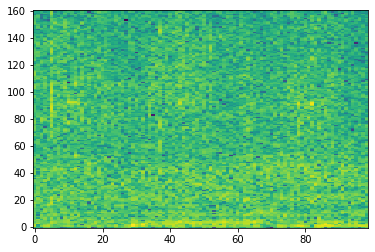

In [60]:
spec = wav2spec('silence/noisy3_part1_exercise_bike.wav',"train/audio/")
print(spec.shape)
plt.imshow(spec, aspect='auto', origin='lower')

In [61]:
def create_data_sets(file_list,directory):
    X = np.zeros([len(file_list),161,99])
    Y = np.zeros([len(file_list)])
    for index, file in enumerate(file_list):
        if index%2000 == 0:
            print(index,file)
        try:
            X[index] = wav2spec(file,directory)
        except ValueError:
            print(index,file,ValueError)
        Y[index] = all_labels.index(file.rsplit("/")[0])
        
    return X, Y
    

In [63]:
X_train, Y_train = create_data_sets(training_list,"train/audio/")

0 yes/004ae714_nohash_0.wav
2000 yes/f2a90886_nohash_0.wav
4000 no/e32ff49d_nohash_1.wav
6000 up/d8ee4734_nohash_1.wav
8000 down/cb8f8307_nohash_6.wav
10000 left/c1eebc0b_nohash_1.wav
12000 right/b93528e3_nohash_0.wav
14000 on/a8688b67_nohash_0.wav
16000 off/96ab6565_nohash_2.wav
18000 stop/8eb4a1bf_nohash_0.wav
20000 go/7cf14c54_nohash_0.wav
22000 silence/noisy2_part57_pink_noise.wav
24000 bed/d926bb17_nohash_0.wav
26000 cat/25c14394_nohash_0.wav
28000 dog/6982fc2a_nohash_2.wav
30000 eight/8281a2a8_nohash_4.wav
32000 five/742d6431_nohash_0.wav
34000 four/6a2fb9a5_nohash_0.wav
36000 happy/7cfb1618_nohash_0.wav
38000 house/ba770f9b_nohash_0.wav
40000 nine/023a61ad_nohash_0.wav
42000 nine/f3210686_nohash_0.wav
44000 one/e2008f39_nohash_0.wav
46000 seven/d0858dce_nohash_0.wav
48000 six/0b09edd3_nohash_2.wav
50000 six/fda46b78_nohash_1.wav
52000 three/f0ae7203_nohash_0.wav
54000 two/25132942_nohash_2.wav
56000 wow/1b4c9b89_nohash_0.wav
58000 zero/48a8a69d_nohash_1.wav


In [64]:
#all of the unknown values are 11
#where < 11 else Y_train = 11
Y_train = np.where(Y_train < 11, Y_train, 11)

#test this and see that it works
print(np.unique(Y_train))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [65]:
print(X_train.shape)
print(Y_train.shape)

(59531, 161, 99)
(59531,)


In [66]:
X_val, Y_val = create_data_sets(validation_list,"train/audio/")

Y_val = np.where(Y_val < 11, Y_val, 11)

print(X_val.shape)
print(Y_val.shape)

0 bed/026290a7_nohash_0.wav
2000 happy/2296b1af_nohash_1.wav
4000 right/099d52ad_nohash_1.wav
6000 up/ad63d93c_nohash_0.wav
(7200, 161, 99)
(7200,)


In [67]:
#save the data ready for the analysis
np.save("train/competition_data/X_train", np.expand_dims(X_train,-1)+1.3)
np.save("train/competition_data/Y_train",Y_train.astype(np.int))
np.save("train/competition_data/X_val",np.expand_dims(X_val,-1)+1.3)
np.save("train/competition_data/Y_val",Y_val.astype(np.int))